In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

np.random.seed(0)

Text(-3.5, 0.31, 'Gaussian Kernel Density')

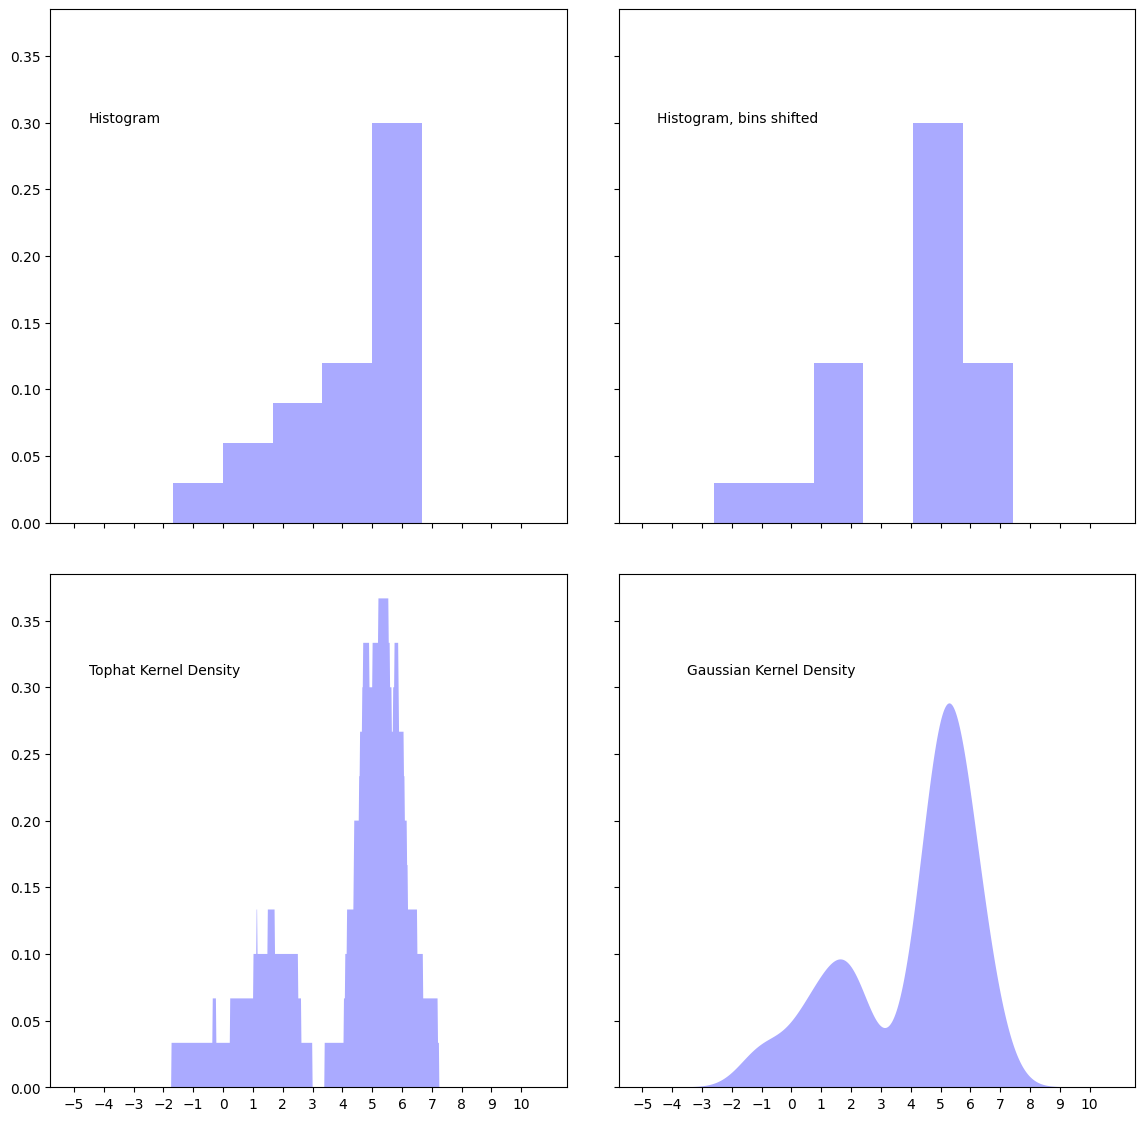

In [158]:
#Histogram
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

np.random.seed(0)

n=20
x=np.concatenate( (np.random.normal(0,1,int(.3*n)) , np.random.normal(5,1,int(.7*n)) ) )[:,np.newaxis]

x_plot=np.linspace(-5,10,1000).reshape(-1,1)
bins = np.linspace(-5, 10, 10)

fig,ax=plt.subplots(2,2,figsize=(14,14),sharex=True,sharey=True)
fig.subplots_adjust(wspace=.1,hspace=.1)

#histogram1
ax[0,0].hist(x[:,0],bins=bins,fc='#AAAAFF',density=True)
ax[0,0].text(-4.5,.30,'Histogram')
ax[0,0].set_xticks(np.arange(-5,11,1))

#histogram2
ax[0,1].hist(x[:,0],bins=bins+0.75,fc='#AAAAFF',density=True)
ax[0,1].text(-4.5,.30,'Histogram, bins shifted')

#Tophat KDE
kde=KernelDensity(kernel='tophat',bandwidth=.75).fit(x)
log_dens=kde.score_samples(x_plot)
ax[1, 0].fill(x_plot[:, 0],np.exp(log_dens),  fc='#AAAAFF')
ax[1, 0].text(-4.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(x)
log_dens = kde.score_samples(x_plot)
ax[1, 1].fill(x_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")


In [46]:
np.random.normal(0,1,10)

array([-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877])

In [12]:
.33*n

6.6000000000000005

In [13]:
int(.33*n)

6

In [24]:
x=np.random.normal(0,1,int(.3*n)) 

In [25]:
x

array([ 0.04575852, -0.18718385,  1.53277921,  1.46935877,  0.15494743,
        0.37816252])

In [42]:
a=np.concatenate(( np.random.normal(0,1,int(.3*n)) , np.random.normal(5,1,int(.7*n)) ) , axis=0 )

In [43]:
a

array([ 0.78632796, -0.4664191 , -0.94444626, -0.41004969, -0.01702041,
        0.37915174,  7.25930895,  4.95774285,  4.044055  ,  4.65401822,
        4.53640403,  5.48148147,  3.45920299,  5.06326199,  5.15650654,
        5.23218104,  4.40268393,  4.76207827,  3.57593909,  4.50668012])

In [41]:
a.shape

(20, 1)

In [119]:
x.min()

-0.977277879876411

In [120]:
x.max()

6.494079073157606

In [57]:
x_plot.shape

(1000, 1)

In [63]:
bins

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

In [64]:
a.shape

(20,)

In [135]:
kde.score(x_plot)

-inf

In [137]:
kde.score_samples(x_plot).shape

(1000,)

In [141]:
log_dens.min()

-inf

In [142]:
log_dens.max()

-1.003302108863785

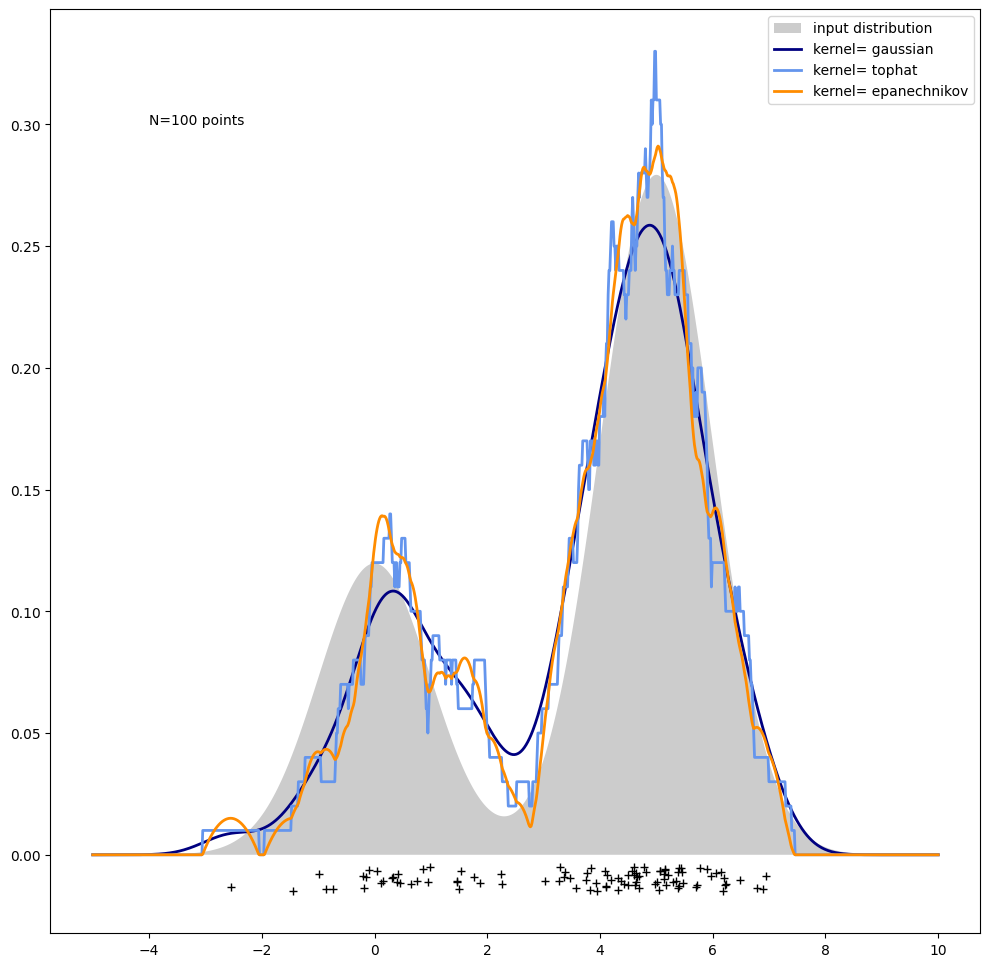

In [208]:
#Kernel Density Estimaion
from sklearn.neighbors import KernelDensity

np.random.seed(0)

n=100
x=np.concatenate( (np.random.normal(0,1,int(.3*n)) , np.random.normal(5,1,int(.7*n))) )[:,np.newaxis]

x_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = ( 0.3 * norm(0, 1).pdf(x_plot[:, 0]) + 0.7 * norm(5, 1).pdf(x_plot[:, 0]) )

plt.figure(figsize=(12,12))
plt.fill(x_plot[:,0],true_dens,fc='k',alpha=.2,label='input distribution')

colors=['navy','cornflowerblue','darkorange']
kernels=['gaussian','tophat','epanechnikov']

for kernel,color in zip(kernels,colors):
    kde=KernelDensity(kernel=kernel,bandwidth=.5).fit(x)
    log_dens=kde.score_samples(x_plot)
    plt.plot(x_plot[:,0],np.exp(log_dens),color=color,lw=2,linestyle='-',label='kernel= %s'%(kernel) )
    
plt.legend()
plt.text(-4, 0.3, "N={0} points".format(n))
plt.plot(x[:, 0], -0.005 - 0.01 * np.random.random(x.shape[0]), '+k')


In [164]:
x_plot.shape

(1000, 1)

In [174]:
true_dens.shape

(1000,)

In [168]:
x.shape

(100, 1)

In [186]:
x_plot[:,0].shape

(1000,)

Text(0.5, 0.98, 'Available Kernels')

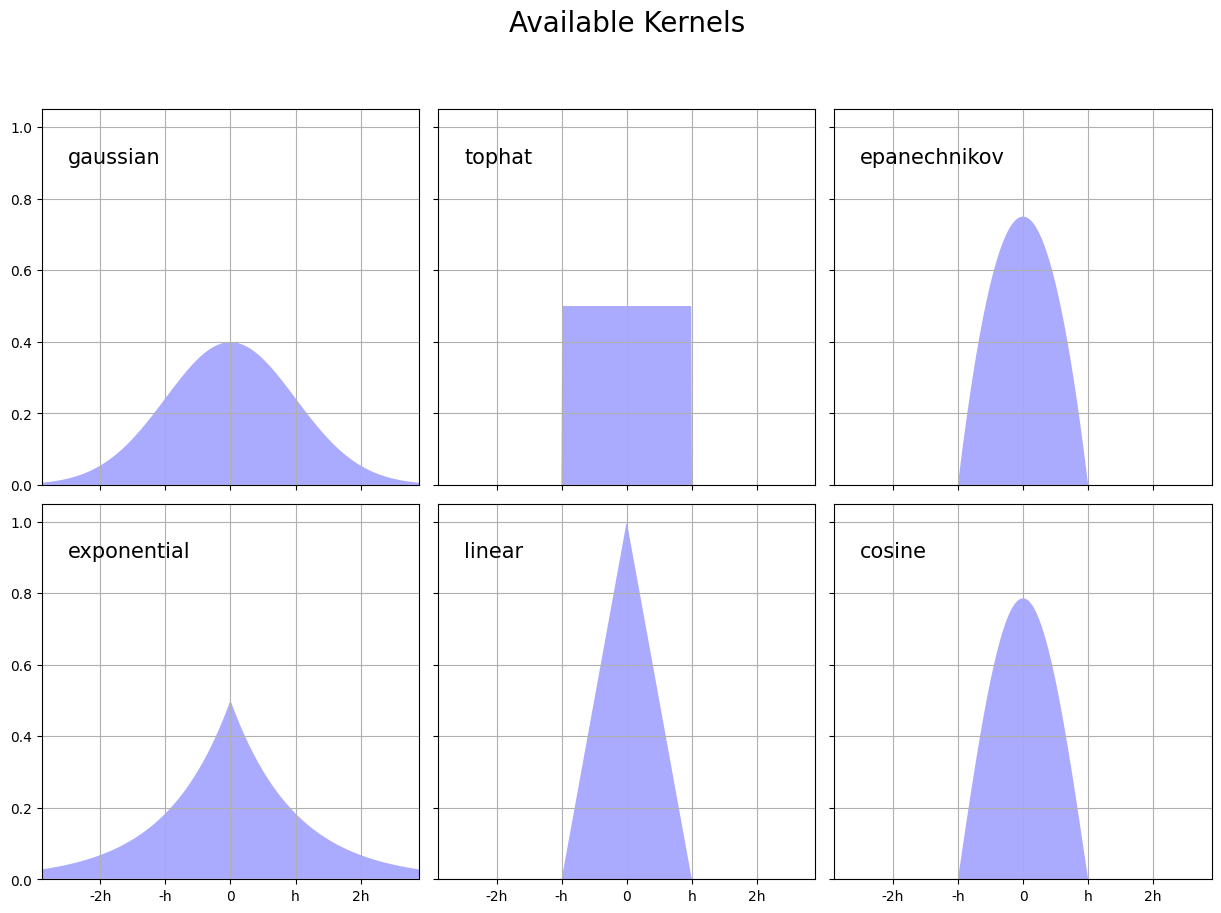

In [291]:
#kernels
x_plot=np.linspace(-6,6,1000)[:,None]
x_src=np.zeros((1,1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(13, 10))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%dh' % x
    
kernels=['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

for i,kernel in enumerate(kernels):
    axi=ax.ravel()[i]
    kde=KernelDensity(kernel=kernel,bandwidth=1).fit(x_src)
    log_dens=kde.score_samples(x_plot)
    axi.fill(x_plot[:,0],np.exp(log_dens),'-k', fc='#AAAAFF')             
    axi.text(-2.5,.9,kernel,fontsize=15) 
    
    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)
    axi.grid()

plt.suptitle('Available Kernels',fontsize=20)
       

In [216]:
x_plot.shape

(1000, 1)

In [218]:
x_src

array([[0.]])

In [220]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [222]:
ax[0,0]

<Axes: >

In [223]:
ax.ravel()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [224]:
ax.ravel()[0]

<Axes: >

In [225]:
x_src

array([[0.]])

In [228]:
log_dens.shape

(1000,)

In [236]:
(list(enumerate(log_dens)))

[(0, -inf),
 (1, -inf),
 (2, -inf),
 (3, -inf),
 (4, -inf),
 (5, -inf),
 (6, -inf),
 (7, -inf),
 (8, -inf),
 (9, -inf),
 (10, -inf),
 (11, -inf),
 (12, -inf),
 (13, -inf),
 (14, -inf),
 (15, -inf),
 (16, -inf),
 (17, -inf),
 (18, -inf),
 (19, -inf),
 (20, -inf),
 (21, -inf),
 (22, -inf),
 (23, -inf),
 (24, -inf),
 (25, -inf),
 (26, -inf),
 (27, -inf),
 (28, -inf),
 (29, -inf),
 (30, -inf),
 (31, -inf),
 (32, -inf),
 (33, -inf),
 (34, -inf),
 (35, -inf),
 (36, -inf),
 (37, -inf),
 (38, -inf),
 (39, -inf),
 (40, -inf),
 (41, -inf),
 (42, -inf),
 (43, -inf),
 (44, -inf),
 (45, -inf),
 (46, -inf),
 (47, -inf),
 (48, -inf),
 (49, -inf),
 (50, -inf),
 (51, -inf),
 (52, -inf),
 (53, -inf),
 (54, -inf),
 (55, -inf),
 (56, -inf),
 (57, -inf),
 (58, -inf),
 (59, -inf),
 (60, -inf),
 (61, -inf),
 (62, -inf),
 (63, -inf),
 (64, -inf),
 (65, -inf),
 (66, -inf),
 (67, -inf),
 (68, -inf),
 (69, -inf),
 (70, -inf),
 (71, -inf),
 (72, -inf),
 (73, -inf),
 (74, -inf),
 (75, -inf),
 (76, -inf),
 (77, -in

In [237]:
582-416

166

In [240]:
list(enumerate(x_plot))

[(0, array([-6.])),
 (1, array([-5.98798799])),
 (2, array([-5.97597598])),
 (3, array([-5.96396396])),
 (4, array([-5.95195195])),
 (5, array([-5.93993994])),
 (6, array([-5.92792793])),
 (7, array([-5.91591592])),
 (8, array([-5.9039039])),
 (9, array([-5.89189189])),
 (10, array([-5.87987988])),
 (11, array([-5.86786787])),
 (12, array([-5.85585586])),
 (13, array([-5.84384384])),
 (14, array([-5.83183183])),
 (15, array([-5.81981982])),
 (16, array([-5.80780781])),
 (17, array([-5.7957958])),
 (18, array([-5.78378378])),
 (19, array([-5.77177177])),
 (20, array([-5.75975976])),
 (21, array([-5.74774775])),
 (22, array([-5.73573574])),
 (23, array([-5.72372372])),
 (24, array([-5.71171171])),
 (25, array([-5.6996997])),
 (26, array([-5.68768769])),
 (27, array([-5.67567568])),
 (28, array([-5.66366366])),
 (29, array([-5.65165165])),
 (30, array([-5.63963964])),
 (31, array([-5.62762763])),
 (32, array([-5.61561562])),
 (33, array([-5.6036036])),
 (34, array([-5.59159159])),
 (35, a

In [241]:
x_src

array([[0.]])

In [269]:
kde.bandwidth_

1

In [270]:
kde.n_features_in_

1

In [271]:
kde.tree_

In [272]:
kde.algorithm

'auto'

In [273]:
kde.kernel

'cosine'

In [282]:
t_kde=KernelDensity(kernel='gaussian',bandwidth=1).fit(x_src).score_samples(x_plot)

In [284]:
list(enumerate(t_kde))
#cosine 417-582
#exponential 0-999
#gaussian 0-999

[(0, -18.918938533204674),
 (1, -18.84693860534889),
 (2, -18.77508296592568),
 (3, -18.703371614935055),
 (4, -18.631804552377),
 (5, -18.56038177825152),
 (6, -18.48910329255862),
 (7, -18.417969095298297),
 (8, -18.346979186470556),
 (9, -18.276133566075384),
 (10, -18.205432234112788),
 (11, -18.134875190582772),
 (12, -18.064462435485332),
 (13, -17.994193968820472),
 (14, -17.924069790588185),
 (15, -17.854089900788473),
 (16, -17.78425429942134),
 (17, -17.714562986486783),
 (18, -17.645015961984807),
 (19, -17.575613225915404),
 (20, -17.506354778278578),
 (21, -17.437240619074327),
 (22, -17.368270748302653),
 (23, -17.29944516596356),
 (24, -17.230763872057043),
 (25, -17.162226866583097),
 (26, -17.09383414954173),
 (27, -17.02558572093294),
 (28, -16.957481580756735),
 (29, -16.889521729013097),
 (30, -16.821706165702036),
 (31, -16.754034890823554),
 (32, -16.686507904377645),
 (33, -16.619125206364316),
 (34, -16.55188679678357),
 (35, -16.484792675635394),
 (36, -16.4178

 - computing KDE in spherical coordinates
 - plot coastlines from coverage
 - computing KDE in spherical coordinates
 - plot coastlines from coverage


<Figure size 1300x1300 with 0 Axes>

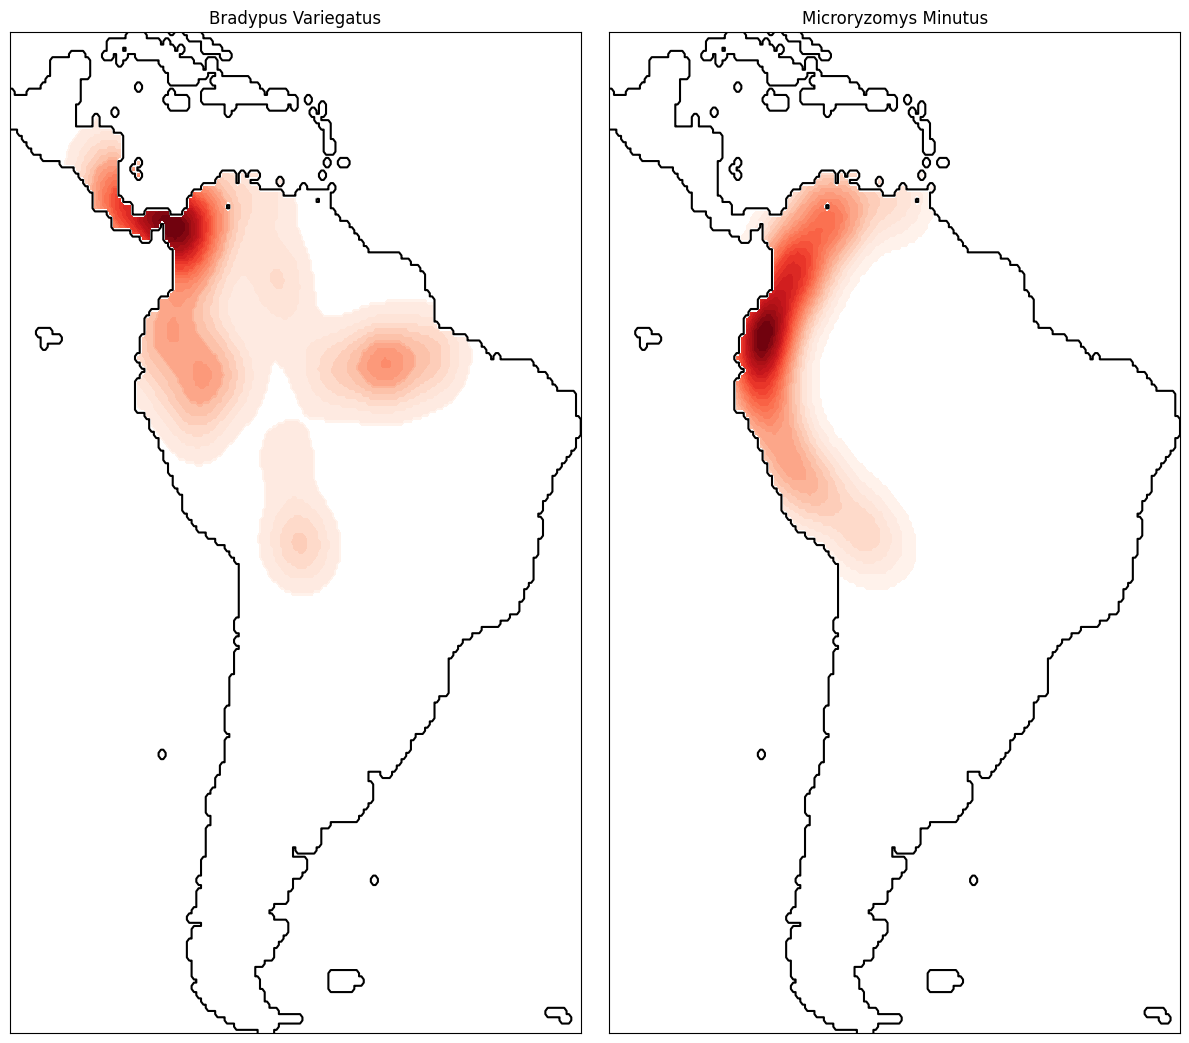

In [373]:
#angular distance metric haversine
from sklearn.neighbors import KernelDensity
from sklearn.datasets import fetch_species_distributions

try:
    from mpl_toolkits.basemap import Basemap
    basemap=True
except ImportError:
    basemap=False
    
def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)
    
     # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)

# Get matrices/arrays of species IDs and locations
data=fetch_species_distributions()
species_names=['Bradypus Variegatus', 'Microryzomys Minutus']
    
xtrain = np.vstack([data['train']['dd lat'], data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')

xtrain *= np.pi / 180.  # Convert lat/long to radians
 
# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure(figsize=(13, 13))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

# Plot map of South America with distributions of each species
fig = plt.figure(figsize=(13, 13))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype='int')
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9998], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

    

In [325]:
set(fetch_species_distributions())

{'Nx',
 'Ny',
 'coverages',
 'grid_size',
 'test',
 'train',
 'x_left_lower_corner',
 'y_left_lower_corner'}

In [337]:
data.train.shape

(1624,)

In [332]:
data.test.shape

(620,)

In [339]:
data['train'].shape

(1624,)

In [343]:
data['test'].shape

(620,)

In [365]:
data.train

array([(b'microryzomys_minutus', -64.7   , -17.85   ),
       (b'microryzomys_minutus', -67.8333, -16.3333 ),
       (b'microryzomys_minutus', -67.8833, -16.3    ), ...,
       (b'microryzomys_minutus_9', -78.4667,  -0.3    ),
       (b'microryzomys_minutus_9', -77.8167,   0.6    ),
       (b'microryzomys_minutus_9', -75.3833,   4.96667)],
      dtype=[('species', 'S22'), ('dd long', '<f4'), ('dd lat', '<f4')])

In [350]:
data['train']['species']

array([b'microryzomys_minutus', b'microryzomys_minutus',
       b'microryzomys_minutus', ..., b'microryzomys_minutus_9',
       b'microryzomys_minutus_9', b'microryzomys_minutus_9'], dtype='|S22')

In [356]:
data['train']['dd long']

array([-64.7   , -67.8333, -67.8833, ..., -78.4667, -77.8167, -75.3833],
      dtype=float32)

In [357]:
data['train']['dd lat']

array([-17.85   , -16.3333 , -16.3    , ...,  -0.3    ,   0.6    ,
         4.96667], dtype=float32)

In [368]:
xtrain.shape

(1624, 2)

In [370]:
ytrain.shape

(1624,)

In [371]:
set(ytrain)

{0, 1}

best band width: 3.79269019073225


Text(0.5, 1.0, '"New" digits drawn from the kernel density model')

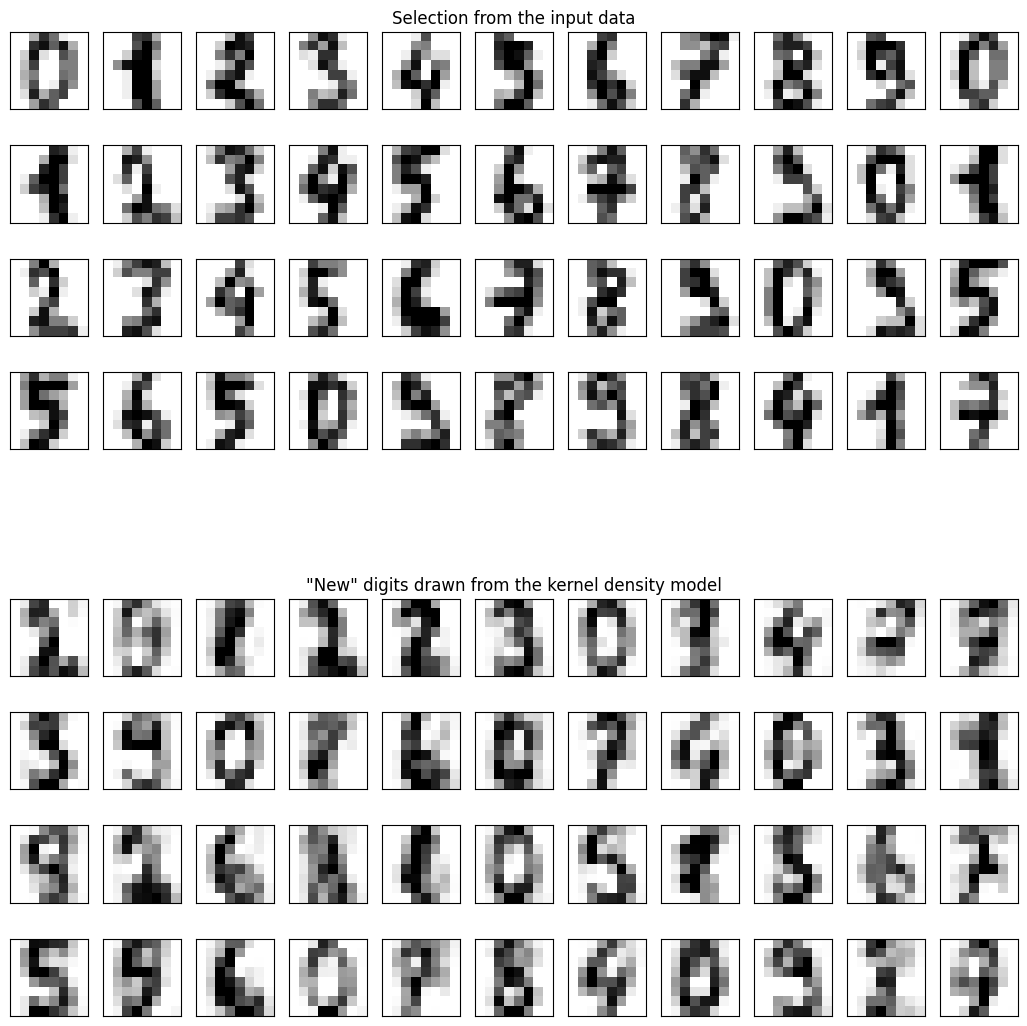

In [424]:
#learn a non-parametric generative model of a dataset 
#in order to efficiently draw new samples from this generative model
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

#load the data
digits=load_digits()

# project the 64-dimensional data to a lower dimension
pca=PCA(n_components=15,whiten=False)
data=pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid=GridSearchCV(KernelDensity(),params)
grid.fit(data)

print('best band width: {0}'.format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data=new_data.reshape(4,11,-1)
real_data=digits.data[:44].reshape(4,11,-1)

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]), figsize=(13, 13))

for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')







In [378]:
digits.data.shape

(1797, 64)

In [385]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [387]:
data.shape

(1797, 15)

In [388]:
np.logspace(-1, 1, 20)

array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])

In [390]:
10**-1 #start of logspace

0.1

In [391]:
10**1 #end of logspace

10

In [393]:
params

{'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
         0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
         1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
         3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])}

In [398]:
grid

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

In [399]:
grid.best_index_

15

In [400]:
grid.best_estimator_

KernelDensity(bandwidth=3.79269019073225)

In [404]:
grid.best_estimator_.bandwidth_

3.79269019073225

In [405]:
grid.best_params_

{'bandwidth': 3.79269019073225}

In [417]:
new_data.shape

(44, 64)

In [420]:
new_data.shape

(4, 11, 64)

In [423]:
real_data.shape

(4, 11, 64)